In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [12]:
d = pd.read_csv('titanic.txt')
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
d = d.drop(['PassengerId', 'Name', 'SibSp', 'Parch','Ticket', 'Cabin', 'Embarked'], axis ='columns')
d.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [14]:
#check for any missing values
d.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [65]:
#Get the age median  
import math
age_median = math.floor(d.Age.median())
age_median

28

In [66]:
d.Age = d.Age.fillna(age_median)
d

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,28.0,23.4500
889,1,1,male,26.0,30.0000


In [67]:
d.Age.isnull().sum()

0

In [68]:
x_inputs = d.drop('Survived', axis ='columns')
x_inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,28.0,23.4500
889,1,male,26.0,30.0000


In [69]:
target_variable = d['Survived']
target_variable.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [70]:
le_sex = LabelEncoder()

x_inputs['Sex_n'] = le_sex.fit_transform(x_inputs['Sex'])
x_inputs.head()

,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [71]:
x_inputs = x_inputs.drop(['Sex'], axis='columns')
x_inputs

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [72]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_inputs,
                                                    target_variable,
                                                    test_size = .35,
                                                    random_state=42)

In [73]:
len(X_train)

579

In [74]:
len(X_test)

312

In [75]:
clf = DecisionTreeClassifier()

In [76]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
clf.score(X_test, y_test)

0.7692307692307693

In [78]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[149,  39],
       [ 33,  91]])

<AxesSubplot:>

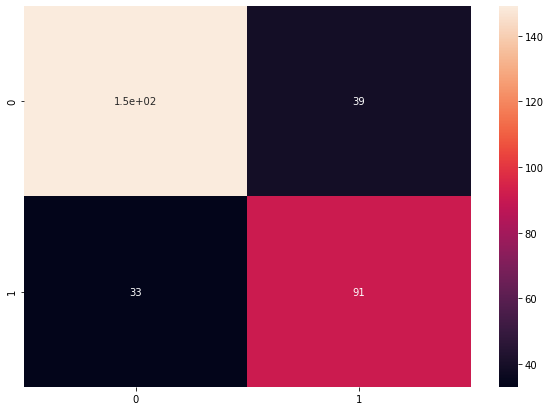

In [79]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize = (10, 7))
plt.xlabel('Predicted')
plt.ylabel('Actual (Truth)')
sn.heatmap(cm, annot=True)